<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_1/Ex2_ANN_Medical_records_for_Pima_Indians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hãy áp dụng ANN cho bài toán xác định một người có bị tiểu đường
hay không?
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
(https://www.kaggle.com/kumargh/pimaindiansdiabetescsv)

patient will have an onset of diabetes within five years.
Fields description follow:
* preg = Number of times pregnant
* plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* pres = Diastolic blood pressure (mm Hg)
* skin = Triceps skin fold thickness (mm)
* test = 2-Hour serum insulin (mu U/ml)
* mass = Body mass index (weight in kg/(height in m)^2)
* pedi = Diabetes pedigree function
* age = Age (years)
* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy

In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/pima-indians-diabetes.csv", delimiter=",")
dataset[5]

array([  5.   , 116.   ,  74.   ,   0.   ,   0.   ,  25.6  ,   0.201,
        30.   ,   0.   ])

In [5]:
dataset.size

6912

In [6]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [7]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit the model
history = model.fit(X, Y, epochs=200,
batch_size=32,
verbose=0,
validation_split=0.3)

In [10]:
# evaluate the model
scores = model.evaluate(X, Y)
scores

24/24 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7305


[0.5457733869552612, 0.73046875]

In [11]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

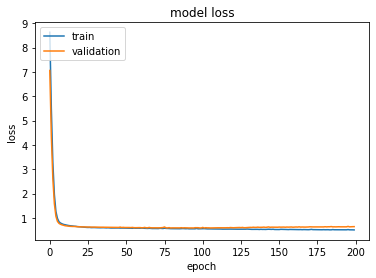

In [12]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[:5])

[0, 0, 1, 0, 1]


In [14]:
X_new= X[0:5, :]
X_new

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [15]:
y_new = model.predict(X_new)
# round predictions
rounded = [round(x[0]) for x in y_new]
print(rounded)

[0, 0, 1, 0, 1]


In [16]:
y = Y[0:5]
y

array([1., 0., 1., 0., 1.])